In [620]:
import yfinance as yf
import pandas as pd
import investpy as inv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import matplotlib
import matplotlib.patches as mpatches
pd.options.display.float_format = '{:.2f}'.format

def calcular_taxa_media_anual(rentabilidade, anos):
    fator_crescimento = 1 + (rentabilidade / 100)    
    taxa_media_anual = (fator_crescimento ** (1 / anos)) - 1    
    taxa_media_anual *= 100    
    return taxa_media_anual

## Defin de cada ação

In [616]:
br = inv.stocks.get_stocks(country='brazil')

tickers_bancoes = ['ITUB4.SA', 'BBDC4.SA', 'BBAS3.SA', 'SANB11.SA']
tickers_eletricas = ['EQTL3.SA', 'CPLE6.SA', 'TRPL4.SA', 'TAEE11.SA', 'CMIG4.SA']
tickers_saneamento = ['SAPR4.SA', 'CSMG3.SA', 'SBSP3.SA']
tickers_estatais = ['PETR4.SA', 'VALE3.SA']
lista_tickers = tickers_bancoes + tickers_eletricas + tickers_saneamento + tickers_estatais

## OBTENDO OS PREÇOS DE FECHAMENTO MENSAL DE CADA TICKER

In [591]:
dicionario = {}
for ticker in lista_tickers:
    df_cotacoes = yf.download(f'{ticker}',
                              start='2013-01-01',
                              end='2023-05-31',
                              interval='1mo',
                              progress=False)
    if 'Adj Close' in df_cotacoes.columns:
        dicionario[ticker] = df_cotacoes['Adj Close']
df_cotacoes = pd.DataFrame(dicionario)

## OBTENDO O HISTÓRICO DA META SELIC

In [593]:
selic = pd.read_excel('indices.xlsx', sheet_name='SELIC')
selic['Date'] = pd.to_datetime(selic['Date'])
selic.set_index('Date', inplace=True)
selic = selic.iloc[::-1]

## PLOTANDO GRÁFICO HISTÓRICO DA SELIC

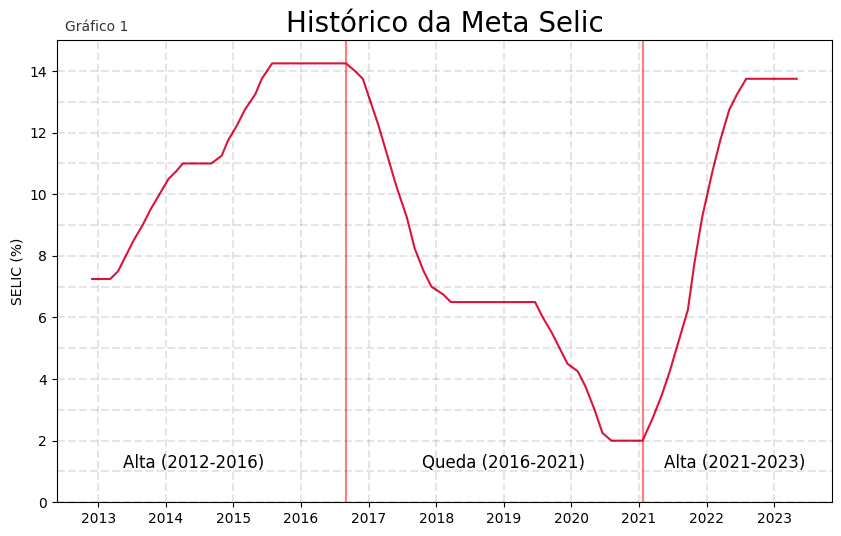

In [594]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(selic['Selic'], color='crimson')
anos = range(2013,2024)
plt.xticks([datetime(year, 1, 1) for year in anos], [year for year in anos])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.ylabel("SELIC (%)")
plt.title("Histórico da Meta Selic", fontsize=20)
plt.ylim(0,15)

for line in range(20):
    ax.axhline(line, color='black', linestyle='--', alpha=0.1)
    
for line in range(2013,2024):
    ax.axvline(datetime(line, 1, 1), color='black', linestyle='--', alpha=0.1)
    
ax.axvline(datetime(2016, 8, 31), color='red', linestyle='-', alpha=0.5)
ax.axvline(datetime(2021, 1, 20), color='red', linestyle='-', alpha=0.5)

ax.text(datetime(2014, 6, 1), 1, "Alta (2012-2016)", ha='center', va='bottom', fontsize=12)
ax.text(datetime(2019, 1, 1), 1, "Queda (2016-2021)", ha='center', va='bottom', fontsize=12)
ax.text(datetime(2022, 6, 1), 1, "Alta (2021-2023)", ha='center', va='bottom', fontsize=12)

ax.text(0.01, 1.02, "Gráfico 1", transform=ax.transAxes, fontsize=10, alpha=0.8)

plt.savefig('selic_historico')
plt.show()

## DEFININDO AS DATAS DE ALTAS E QUEDAS DA SELIC NOS ULTIMOS 10 ANOS

In [595]:
alta_selic_1_inicio = datetime.strptime('2012-11-28', '%Y-%m-%d')
alta_selic_1_fim = datetime.strptime('2016-08-31', '%Y-%m-%d')

queda_selic_1_inicio = datetime.strptime('2016-08-31', '%Y-%m-%d')
queda_selic_1_fim = datetime.strptime('2021-01-20', '%Y-%m-%d')

alta_selic_2_inicio = datetime.strptime('2021-01-20', '%Y-%m-%d')
alta_selic_2_fim = datetime.strptime('2023-05-31', '%Y-%m-%d')

alta_1 = selic.loc[alta_selic_1_inicio:alta_selic_1_fim]
queda_1 = selic.loc[queda_selic_1_inicio:queda_selic_1_fim]
alta_2 = selic.loc[alta_selic_2_inicio:alta_selic_2_fim]

dfc_alta_1 = df_cotacoes[alta_selic_1_inicio:alta_selic_1_fim]
dfc_queda_1 = df_cotacoes[queda_selic_1_inicio:queda_selic_1_fim]
dfc_alta_2 = df_cotacoes[alta_selic_2_inicio:alta_selic_2_fim]

## PLOTANDO GRÁFICO DO IMPACTO DA SELIC NOS GRANDES BANCOS

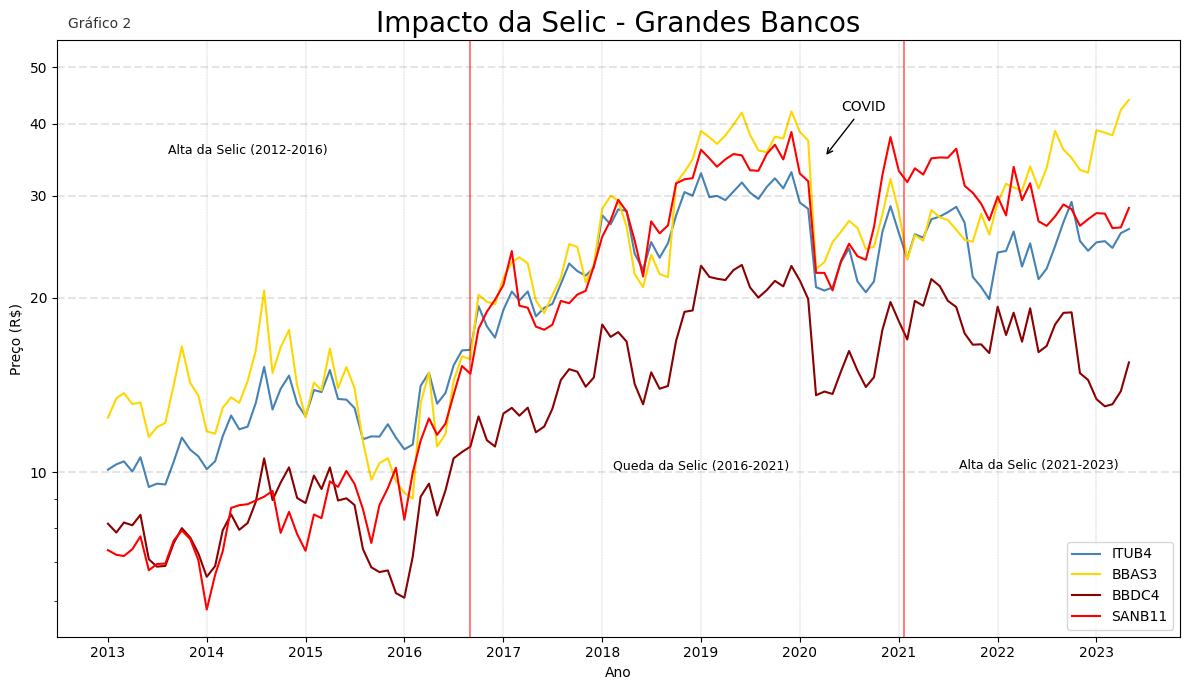

In [606]:
fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(df_cotacoes.index, df_cotacoes['ITUB4.SA'], color='steelblue', label='ITUB4')
ax.plot(df_cotacoes.index, df_cotacoes['BBAS3.SA'], color='gold', label='BBAS3')
ax.plot(df_cotacoes.index, df_cotacoes['BBDC4.SA'], color='darkred', label='BBDC4')
ax.plot(df_cotacoes.index, df_cotacoes['SANB11.SA'], color='red', label='SANB11')

ax.set_title('Impacto da Selic - Grandes Bancos', fontsize=20)
ax.set_xlabel('Ano')
ax.set_ylabel('Preço (R$)')
ax.set_yscale('log')

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.legend()

for line in range(10,60,10):
    ax.axhline(line, color='black', linestyle='--', alpha=0.1)
        
for year in range(df_cotacoes.index[0].year + 1, df_cotacoes.index[-1].year + 1):
    ax.axvline(x=pd.Timestamp(year, 1, 1), color='gray', linestyle='--', linewidth=0.2)
    
ax.annotate('COVID', xy=(pd.Timestamp(2020, 4, 1),35), xytext=(pd.Timestamp(2020, 6, 1),42), 
             arrowprops={"arrowstyle":"->","color":"black"})

ax.axvline(datetime(2016, 8, 31), color='red', linestyle='-', alpha=0.5)
ax.axvline(datetime(2021, 1, 20), color='red', linestyle='-', alpha=0.5)

ax.text(datetime(2014, 6, 1), 35, "Alta da Selic (2012-2016)", ha='center', va='bottom', fontsize=9)
ax.text(datetime(2019, 1, 1), 10, "Queda da Selic (2016-2021)", ha='center', va='bottom', fontsize=9)
ax.text(datetime(2022, 6, 1), 10, "Alta da Selic (2021-2023)", ha='center', va='bottom', fontsize=9)

ax.set_yticks([10, 20, 30, 40, 50])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax.text(0.01, 1.02, "Gráfico 2", transform=ax.transAxes, fontsize=10, alpha=0.8)

plt.tight_layout()
plt.savefig('impacto_selic_bancoes')
plt.show()

## PLOTANDO GRÁFICO DO IMPACTO DA SELIC NAS EMPRESAS DE ENERGIA ELÉTRICA

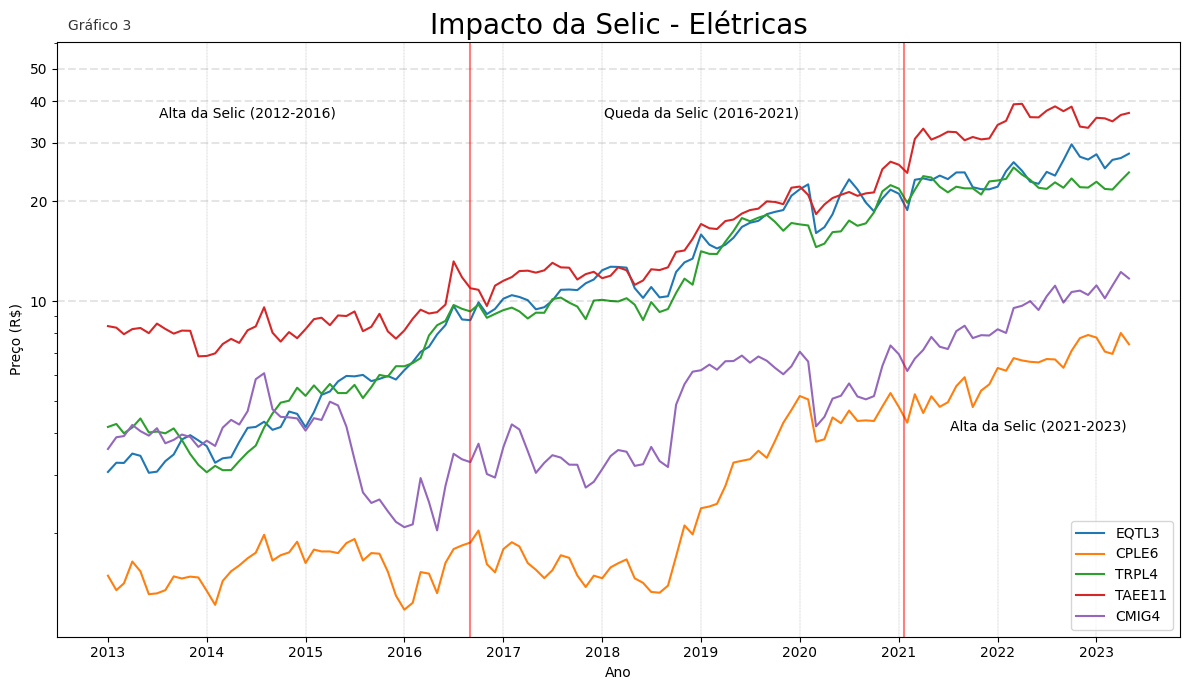

In [605]:
fig, ax = plt.subplots(figsize=(12, 7))

for ticker in tickers_eletricas:
    ax.plot(df_cotacoes.index, df_cotacoes[ticker], label=ticker.replace('.SA', ''))

ax.set_title('Impacto da Selic - Elétricas', fontsize=20)
ax.set_xlabel('Ano')
ax.set_ylabel('Preço (R$)')
ax.set_yscale('log')

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.legend()
        
for line in range(10,60,10):
    ax.axhline(line, color='black', linestyle='--', alpha=0.1)
        
for year in range(df_cotacoes.index[0].year + 1, df_cotacoes.index[-1].year + 1):
    ax.axvline(x=pd.Timestamp(year, 1, 1), color='gray', linestyle='--', linewidth=0.2)

ax.axvline(datetime(2016, 8, 31), color='red', linestyle='-', alpha=0.5)
ax.axvline(datetime(2021, 1, 20), color='red', linestyle='-', alpha=0.5)

ax.text(datetime(2014, 6, 1), 35, "Alta da Selic (2012-2016)", ha='center', va='bottom', fontsize=10)
ax.text(datetime(2019, 1, 1), 35, "Queda da Selic (2016-2021)", ha='center', va='bottom', fontsize=10)
ax.text(datetime(2022, 6, 1), 4, "Alta da Selic (2021-2023)", ha='center', va='bottom', fontsize=10)    

ax.set_yticks([10, 20, 30, 40, 50])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax.text(0.01, 1.02, "Gráfico 3", transform=ax.transAxes, fontsize=10, alpha=0.8)

plt.tight_layout()
plt.savefig('impacto_selic_eletricas')
plt.show()

## PLOTANDO GRÁFICO DO IMPACTO DA SELIC NAS EMPRESAS DE SANEAMENTO

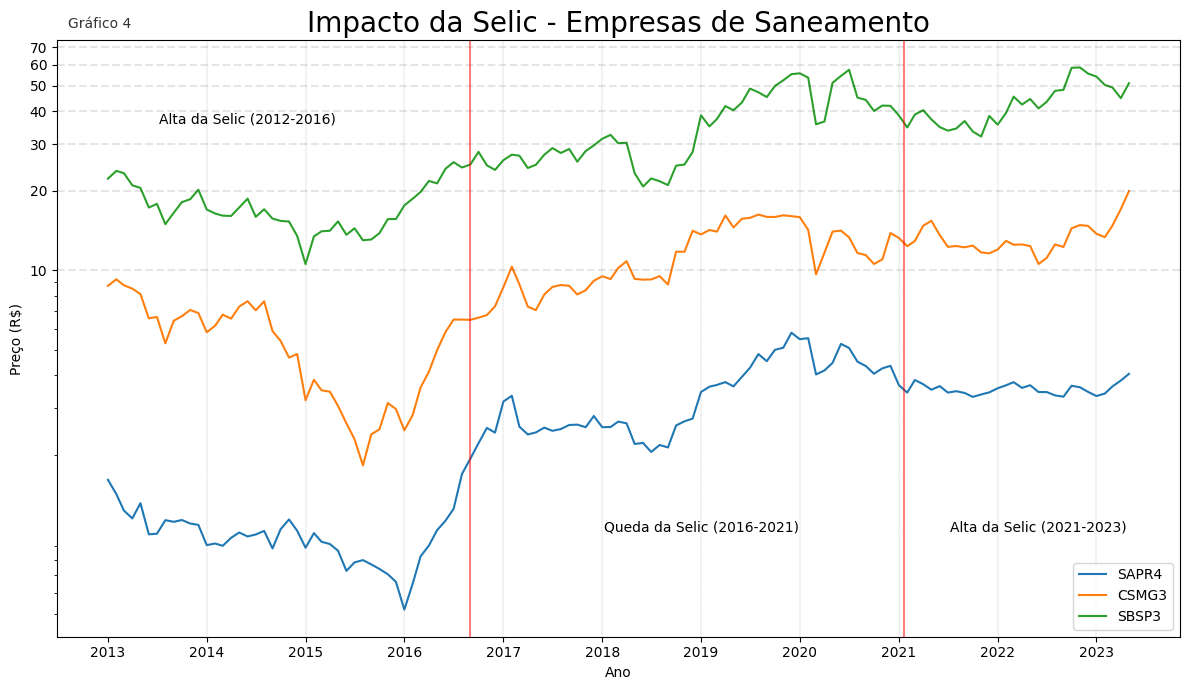

In [604]:
fig, ax = plt.subplots(figsize=(12, 7))

for ticker in tickers_saneamento:
    ax.plot(df_cotacoes.index, df_cotacoes[ticker], label=ticker.replace('.SA', ''))

ax.set_title('Impacto da Selic - Empresas de Saneamento', fontsize=20)
ax.set_xlabel('Ano')
ax.set_ylabel('Preço (R$)')
ax.set_yscale('log')

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.legend()
        
for line in range(10,80,10):
    ax.axhline(line, color='black', linestyle='--', alpha=0.1)
        
for year in range(df_cotacoes.index[0].year + 1, df_cotacoes.index[-1].year + 1):
    ax.axvline(x=pd.Timestamp(year, 1, 1), color='gray', linestyle='--', linewidth=0.2)

ax.axvline(datetime(2016, 8, 31), color='red', linestyle='-', alpha=0.5)
ax.axvline(datetime(2021, 1, 20), color='red', linestyle='-', alpha=0.5)

ax.text(datetime(2014, 6, 1), 35, "Alta da Selic (2012-2016)", ha='center', va='bottom', fontsize=10)
ax.text(datetime(2019, 1, 1), 1, "Queda da Selic (2016-2021)", ha='center', va='bottom', fontsize=10)
ax.text(datetime(2022, 6, 1), 1, "Alta da Selic (2021-2023)", ha='center', va='bottom', fontsize=10)    

ax.set_yticks([10, 20, 30, 40, 50, 60, 70])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.legend(loc='lower right')

ax.text(0.01, 1.02, "Gráfico 4", transform=ax.transAxes, fontsize=10, alpha=0.8)

plt.tight_layout()
plt.savefig('impacto_selic_saneamento')
plt.show()

## PLOTANDO GRÁFICO DO IMPACTO DA SELIC NA VALE E NA PETROBRÁS

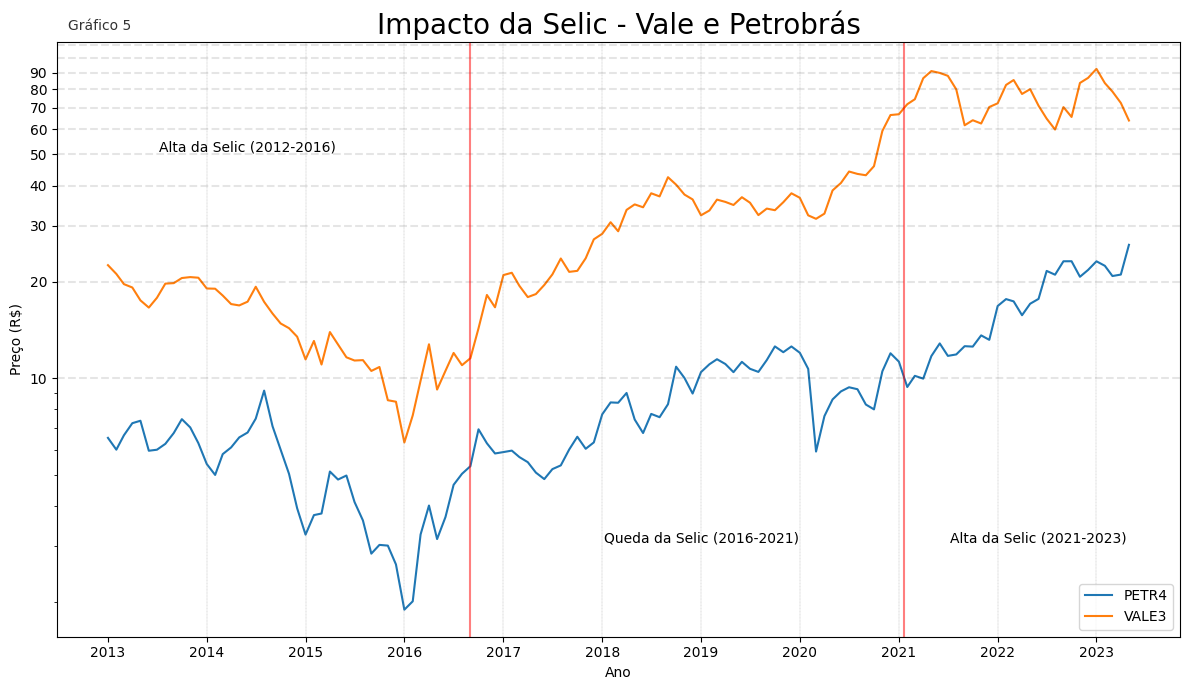

In [600]:
fig, ax = plt.subplots(figsize=(12, 7))

for ticker in tickers_estatais:
    ax.plot(df_cotacoes.index, df_cotacoes[ticker], label=ticker.replace('.SA', ''))

ax.set_title('Impacto da Selic - Vale e Petrobrás', fontsize=20)
ax.set_xlabel('Ano')
ax.set_ylabel('Preço (R$)')
ax.set_yscale('log')

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.legend()
        
for line in range(10,120,10):
    ax.axhline(line, color='black', linestyle='--', alpha=0.1)
        
for year in range(df_cotacoes.index[0].year + 1, df_cotacoes.index[-1].year + 1):
    ax.axvline(x=pd.Timestamp(year, 1, 1), color='gray', linestyle='--', linewidth=0.2)

ax.axvline(datetime(2016, 8, 31), color='red', linestyle='-', alpha=0.5)
ax.axvline(datetime(2021, 1, 20), color='red', linestyle='-', alpha=0.5)

ax.text(datetime(2014, 6, 1), 50, "Alta da Selic (2012-2016)", ha='center', va='bottom', fontsize=10)
ax.text(datetime(2019, 1, 1), 3, "Queda da Selic (2016-2021)", ha='center', va='bottom', fontsize=10)
ax.text(datetime(2022, 6, 1), 3, "Alta da Selic (2021-2023)", ha='center', va='bottom', fontsize=10)    

ax.set_yticks([10, 20, 30, 40, 50, 60, 70, 80, 90])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.legend(loc='lower right')

ax.text(0.01, 1.02, "Gráfico 5", transform=ax.transAxes, fontsize=10, alpha=0.8)

plt.tight_layout()
plt.savefig('impacto_selic_estatais')
plt.show()

## PLOTANDO GRÁFICO DO RETORNO MÉDIO ANUAL DAS AÇÕES EM DIFERENTES PERÍODOS DA SELIC

C:\Users\felip\AppData\Local\Temp\ipykernel_5100\2414299629.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[valores[0]].set_xticklabels(labels, rotation='vertical')


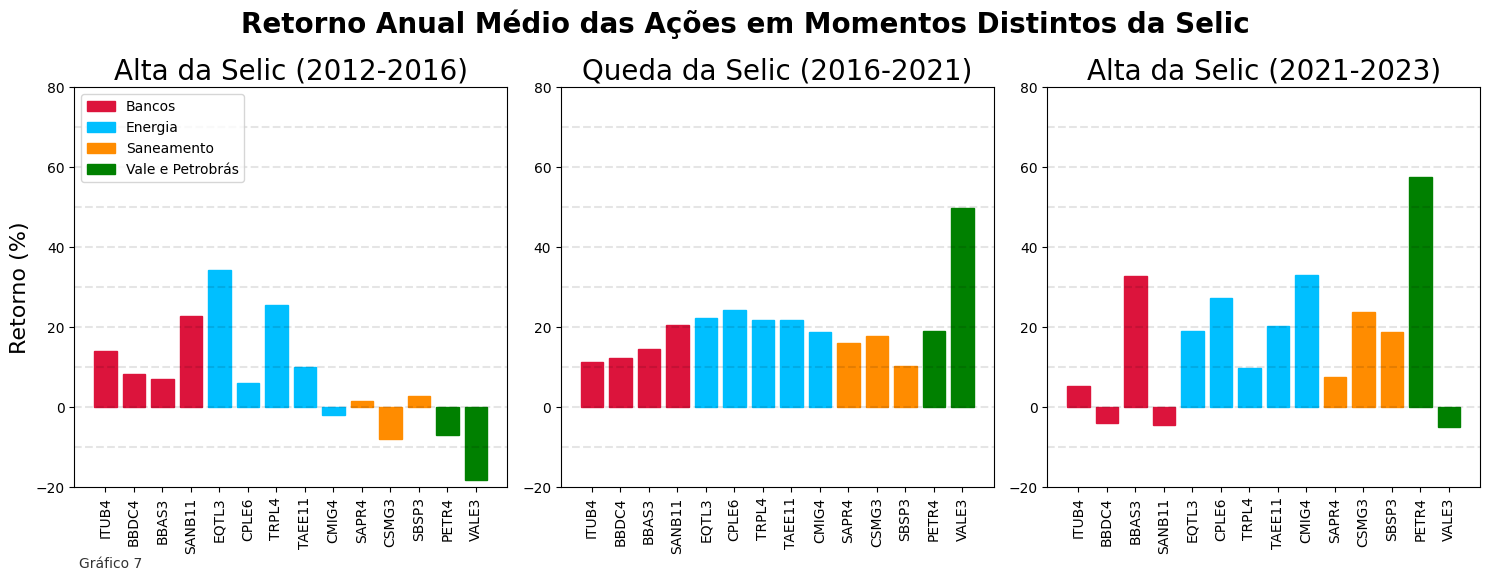

In [614]:
fig, ax = plt.subplots(ncols=3, figsize=(15,6))

fig.suptitle('Retorno Anual Médio das Ações em Momentos Distintos da Selic', fontsize=20, fontweight="bold")

dicionario = {'Alta da Selic (2012-2016)':[0, dfc_alta_1],
              'Queda da Selic (2016-2021)':[1, dfc_queda_1],
              'Alta da Selic (2021-2023)':[2, dfc_alta_2]}

colors = {'Bancos': 'crimson',
          'Energia': 'deepskyblue',
          'Saneamento': 'darkorange',
          'Vale e Petrobrás': 'green'}

legend_patches = []
for categoria, cor in colors.items():
    legend_patches.append(mpatches.Patch(color=cor, label=categoria))

for titulo, valores in dicionario.items():

    years = ((valores[1].index[-1]-valores[1].index[0]).days)/365
    rent = (valores[1].iloc[-1]/valores[1].iloc[0])-1
    labels = list(valores[1].columns)
    labels = [item.replace('.SA', '') for item in labels]
    ax[valores[0]].set_title(titulo, fontsize=20)
    bars=ax[valores[0]].bar(labels, calcular_taxa_media_anual(rent*100, years))
    
    for bar, label in zip(bars, labels):
        if label in ["ITUB4", "BBDC4", "SANB11", "BBAS3"]:
            bar.set_color('crimson')
        elif label in ["PETR4", "VALE3"]:
            bar.set_color('green')
        elif label in ['EQTL3', 'CPLE6', 'TRPL4', 'TAEE11', 'CMIG4']:
            bar.set_color('deepskyblue')
        else:
            bar.set_color('darkorange')
    
    if valores[0] == 0:    
        ax[valores[0]].set_ylabel('Retorno (%)', fontsize=16)
        ax[valores[0]].legend(handles=legend_patches, loc='upper left')
        ax[valores[0]].text(0.01, -0.2, "Gráfico 7", transform=ax[valores[0]].transAxes, fontsize=10, alpha=0.8)
    ax[valores[0]].set_xticklabels(labels, rotation='vertical')
    ax[valores[0]].set_ylim(-20,80)
    for line in range(-10,80,10):
        ax[valores[0]].axhline(line, color='black', linestyle='--', alpha=0.1)

plt.tight_layout()
plt.savefig('retorno_medio_anual')
plt.show()

## GERANDO UM DATAFRAME PARA OBSERVAR A CORRELAÇÃO ENTRE AS AÇÕES E A SELIC

In [618]:
dicionario = {}

for ticker in lista_tickers:
    df_cotacoes = yf.download(f'{ticker}',
                              start='2013-01-01',
                              end='2023-05-31',
                              interval='1d',
                              progress=False)
    if 'Adj Close' in df_cotacoes.columns:
        dicionario[ticker] = df_cotacoes['Adj Close']
df_cotacoes_diarias = pd.DataFrame(dicionario)

correlation = pd.merge(selic, df_cotacoes_diarias.iloc[1:], on='Date', how='left')
correlation = df_corr.corr()['Selic'].sort_values()[:14]

## PLOTANDO UM GRÁFICO DE CORRELAÇÃO ENTRE A SELIC E O PREÇO DAS AÇÕES

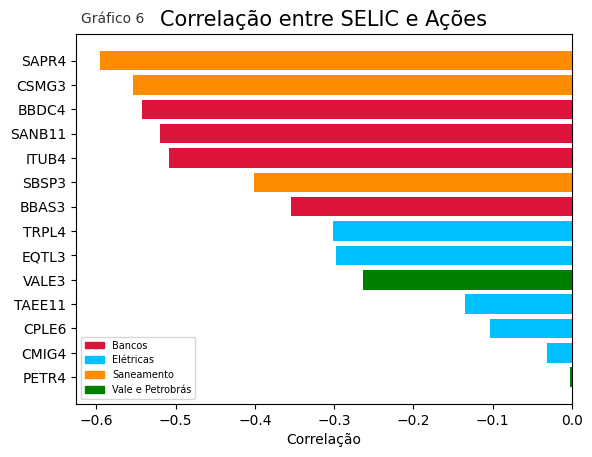

In [624]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

correlation_sorted = correlation.sort_values(ascending=False)
labels = correlation_sorted.index

colors = {
    'tickers_bancoes': 'crimson',
    'tickers_eletricas': 'deepskyblue',
    'tickers_saneamento': 'darkorange',
    'tickers_estatais': 'green'
}

for label in labels:
    if label in tickers_bancoes:
        color = colors['tickers_bancoes']
    elif label in tickers_eletricas:
        color = colors['tickers_eletricas']
    elif label in tickers_saneamento:
        color = colors['tickers_saneamento']
    else:
        color = colors['tickers_estatais']
    
    plt.barh(label.replace('.SA',''), correlation_sorted[label], color=color)

plt.xlabel('Correlação')
plt.title('Correlação entre SELIC e Ações', fontsize=15)

patches = [
    mpatches.Patch(color='crimson', label='Bancos'),
    mpatches.Patch(color='deepskyblue', label='Elétricas'),
    mpatches.Patch(color='darkorange', label='Saneamento'),
    mpatches.Patch(color='green', label='Vale e Petrobrás')
]
ax = plt.gca()
plt.text(0.01, 1.03, "Gráfico 6", transform=ax.transAxes, fontsize=10, alpha=0.8)

plt.legend(handles=patches, loc='lower left', fontsize=7)
plt.savefig('correlacao_SELIC')
plt.show()

In [333]:
# obtendo a mediana dos rendimentos das ações do ibovespa por ano
mediana_rendimentos_ibov = []
for ano in range(2013, 2023):
    mediana_rendimentos_ibov.append(df.loc[tickers_ibov, ano].median())

In [358]:
mediana_rendimentos_bancoes = []
for ano in range(2013, 2023):
    mediana_rendimentos_bancoes.append(df.loc[tickers_bancoes, ano].median())

In [316]:
mediana_rendimentos_energia = []
for ano in range(2013, 2023):
    mediana_rendimentos_energia.append(df.loc[tickers_iee, ano].median())

In [310]:
mediana_rendimentos_smallcaps = []
for ano in range(2013, 2023):
    mediana_rendimentos_smallcaps.append(df.loc[tickers_smallcaps, ano].median())